In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None
from IPython.display import Image

In [2]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)


In [3]:
# Define translations for column names
column_translations = {
    'index': 'Year',
    'Reismotieven': 'Travel motive',
    'aantal': 'Count',
    'km': 'Distance in km',
    'Minuten': 'Minutes',
    'snelheid': 'Speed in kmh'
}

# Define translations for travel motives
travel_motive_translations = {
    'Van en naar het werk': 'Commuting to and from work',
    'Vrije tijd': 'Free time',
    'Winkelen. boodschappen doen': 'Groceries and shopping',
    'Onderwijs volgen. cursus. kinderopvang': 'Education',
    'Totaal': 'Total',
    'Overige reismotieven': 'Other'
}

# Define the data subsets
total = data.iloc[:, [0, 1, 2, 3]]
driver = data.iloc[:, [0, 4, 5, 6]]
passenger = data.iloc[:, [0, 7, 8, 9]]
train = data.iloc[:, [0, 10, 11, 12]]
btm = data.iloc[:, [0, 13, 14, 15]]
bike = data.iloc[:, [0, 16, 17, 18]]
walking = data.iloc[:, [0, 19, 20, 21]]
others = data.iloc[:, [0, 22, 23, 24]]

# List of the datasets
datasets = [total, driver, passenger, train, btm, bike, walking, others]

# Iterate over each dataset
for df in datasets:
    # Drop the first two levels of the column index if applicable
    df.columns = df.columns.droplevel([0, 1])
    df.reset_index(inplace=True)
    # df.index.name = 'Year'
    
    # Rename columns to English
    df.rename(columns=column_translations, inplace=True)
    
    # Translate travel motives
    df['Travel motive'] = df['Travel motive'].replace(travel_motive_translations)
    
    # Convert columns to numeric, if necessary
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    df['Distance in km'] = pd.to_numeric(df['Distance in km'], errors='coerce')
    df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
    
    # Calculate 'Speed in kmh' by dividing distance by time in hours and round to two decimals
    df['Speed in kmh'] = (df['Distance in km'] / (df['Minutes'] / 60)).round(2)
    
# Display the updated 'btm' dataset as a check
display(total)


Perioden,Year,Travel motive,Count,Distance in km,Minutes,Speed in kmh
0,1999,Total,3.41,10.96,23.72,27.72
1,1999,Commuting to and from work,0.59,14.78,24.83,35.71
2,1999,Groceries and shopping,0.73,4.96,14.97,19.88
3,1999,Education,0.30,6.85,17.64,23.30
4,1999,Free time,1.19,12.42,31.37,23.76
...,...,...,...,...,...,...
121,2019,Commuting to and from work,0.61,16.13,24.83,38.98
122,2019,Groceries and shopping,0.57,5.36,14.35,22.41
123,2019,Education,0.28,7.28,18.58,23.51
124,2019,Free time,1.05,13.50,32.59,24.85


KeyError: False

Travel motive
Commuting to and from work    37.230952
Other                         36.823333
Total                         28.099048
Free time                     24.151905
Education                     23.423810
Groceries and shopping        21.018095
Name: Speed in kmh, dtype: float64


C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_144\2880760056.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


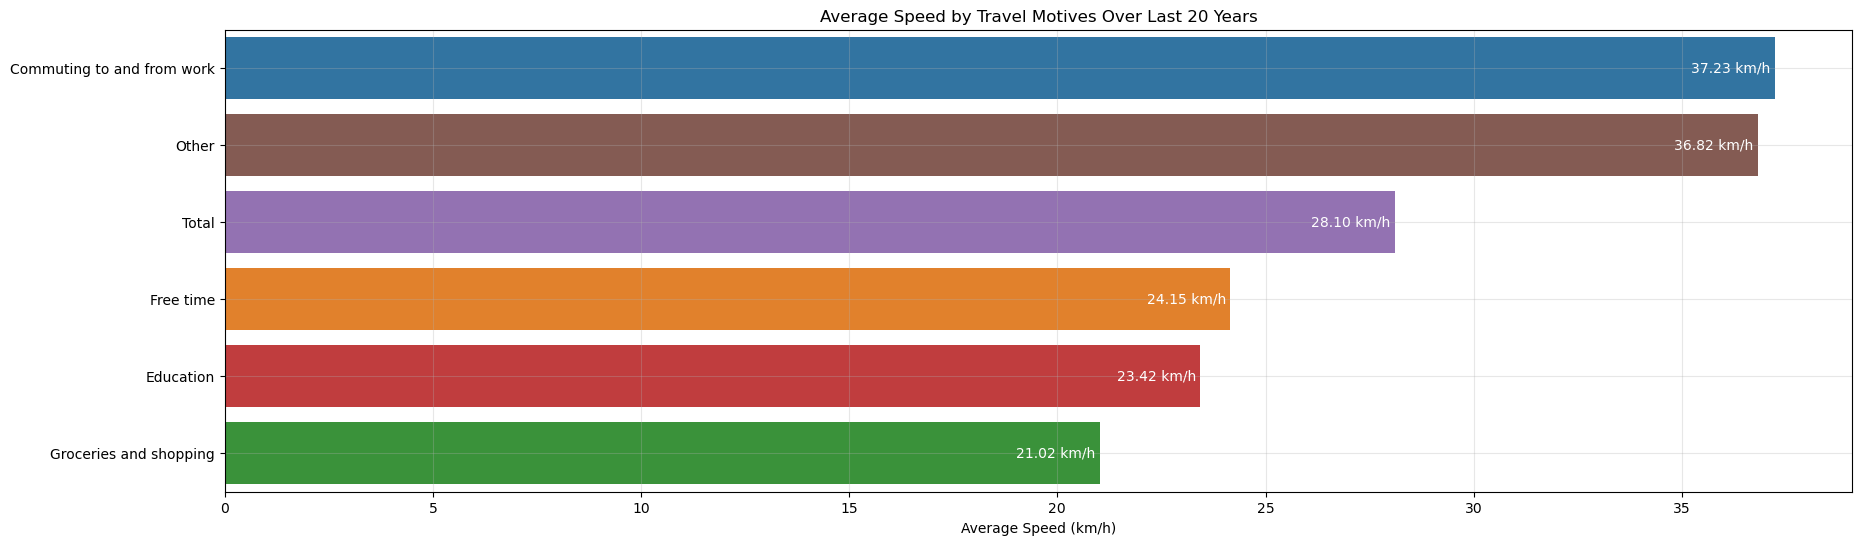

In [4]:

# Calculate the average speed by travel motive
average_speed = total.groupby('Travel motive')['Speed in kmh'].mean().sort_values(ascending=False)
print(average_speed)
# Define a color dictionary for each travel motive
color_map = {
    'Commuting to and from work': '#1f77b4',
    'Free time': '#ff7f0e',
    'Groceries and shopping': '#2ca02c',
    'Education': '#d62728',
    'Total': '#9467bd',
    'Other': '#8c564b'
}

# Prepare the data in a DataFrame format
average_speed_df = pd.DataFrame({
    'Travel motive': average_speed.index,
    'Average speed (km/h)': average_speed.values
})

# Set plot size
plt.figure(figsize=(21, 6))

# Create the bar plot with custom colors and specified order
sns.barplot(
    data=average_speed_df,
    y='Travel motive',
    x='Average speed (km/h)',
    palette=color_map
)

# Add value labels to the end of each bar
for index, value in enumerate(average_speed_df['Average speed (km/h)']):
    plt.text(
        value - 2, index,  # Position slightly to the left of the bar
        f'{value:.2f} km/h',  # Format value to 2 decimal places
        color='white',
        va='center'
    )

# Set the title and labels
plt.title('Average Speed by Travel Motives Over Last 20 Years')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('')
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig("average_speed_by_travel_motives.png", bbox_inches='tight')
# Show the plot
plt.show()

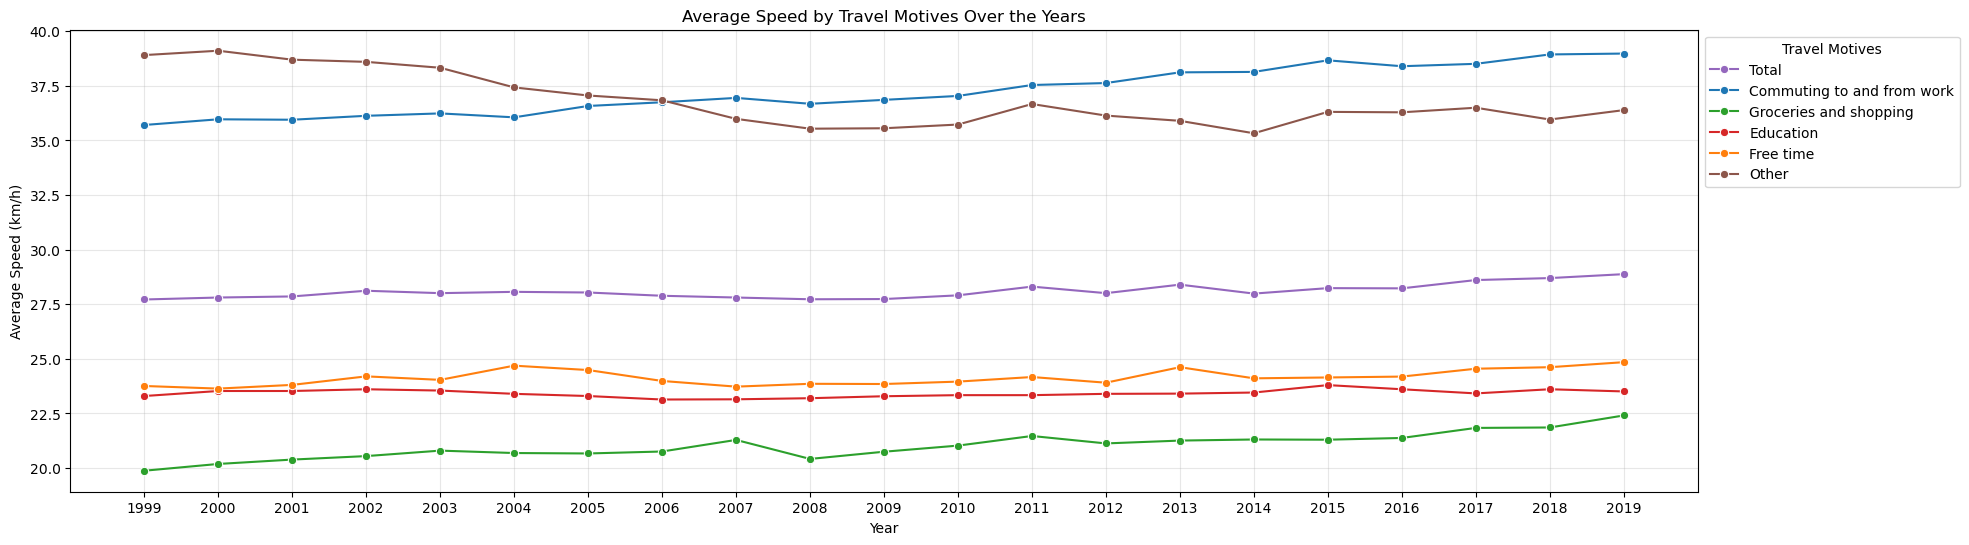

In [5]:
# Set plot size
plt.figure(figsize=(21, 6))

# Create the line plot
sns.lineplot(
    data=total,
    x='Year',
    y='Speed in kmh',
    hue='Travel motive',
    palette=color_map,  # Use the same color map as before
    marker='o'  # Optional: adds markers at each data point
)

# Set the title and labels
plt.title('Average Speed by Travel Motives Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')

# Add legend
plt.legend(title='Travel Motives', loc='upper left', bbox_to_anchor=(1, 1))

# Show grid for better readability
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig("average_speed_by_travel_motives_line_plot_with_diff.png", bbox_inches='tight')

# Show the plot
plt.show()


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'totaal' DataFrame is already defined and looks similar to the one described earlier

# # # Display the DataFrame
# # display(totaal)

# # # Resetting the index to treat 'Perioden' as a regular column
# totaal.reset_index(inplace=True)

# # # Display the DataFrame's columns and the first few rows
# # print(totaal.columns)
# # display(totaal.head())

# # Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean speed
# grouped_speed = totaal.groupby(['index', 'Reismotieven'])['snelheid'].mean().reset_index()

# # Print the grouped data to verify
# print(grouped_speed)

# # Create the line plot for speed changes over time for each motive
# plt.figure(figsize=(14, 7))

# # Loop through each unique travel motive to plot
# for motive in grouped_speed['Reismotieven'].unique():
#     motive_data = grouped_speed[grouped_speed['Reismotieven'] == motive]
#     plt.plot(motive_data['index'], motive_data['snelheid'], marker='o', label=motive)

# # Add titles and labels
# plt.title('Change of Speed Over Time by Travel Motivation')
# plt.xlabel('Year')
# plt.ylabel('Average Speed (km/h)')
# plt.xticks(rotation=45)
# # plt.xticks(range(min(grouped_speed['index']), max(grouped_speed['index']) + 1))  # Ensuring all years are shown

# # Add a legend
# plt.legend(title='Travel Motivation', loc='upper left')  # You can adjust the location as needed

# # Add a grid for better readability
# plt.grid()

# # Adjust layout to fit everything nicely
# plt.tight_layout()

# # Show the plot
# plt.show()


In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Display the DataFrame to verify
# display(totaal)

# # Resetting the index to treat 'Perioden' as a regular column
# totaal.reset_index(inplace=True)

# # Display the DataFrame's columns and the first few rows
# print(totaal.columns)
# display(totaal.head())

# # Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean distance
# grouped_distance = totaal.groupby(['index', 'Reismotieven'])['km'].mean().reset_index()

# # Print the grouped data to verify
# print(grouped_distance)

# # Create the line plot for distance changes over time for each motive
# plt.figure(figsize=(14, 7))

# # Loop through each unique travel motive to plot the distance traveled
# for motive in grouped_distance['Reismotieven'].unique():
#     motive_data = grouped_distance[grouped_distance['Reismotieven'] == motive]
#     plt.plot(motive_data['index'], motive_data['km'], marker='o', label=motive)

# # Add titles and labels
# plt.title('Change of Distance Traveled Over Time by Travel Motivation')
# plt.xlabel('Year')
# plt.ylabel('Average Distance Traveled (km)')
# plt.xticks(rotation=45)

# # Add a legend
# plt.legend(title='Travel Motivation', loc='upper left')  # Adjust the location as needed

# # Add a grid for better readability
# plt.grid()

# # Adjust layout to fit everything nicely
# plt.tight_layout()

# # Show the plot
# plt.show()


In [8]:
# # Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean time traveled
# grouped_time = totaal.groupby(['index', 'Reismotieven'])['Minuten'].mean().reset_index()

# # Print the grouped data to verify
# print(grouped_time)

# # Create the line plot for time traveled changes over time for each motive
# plt.figure(figsize=(14, 7))

# # Loop through each unique travel motive to plot the time traveled
# for motive in grouped_time['Reismotieven'].unique():
#     motive_data = grouped_time[grouped_time['Reismotieven'] == motive]
#     plt.plot(motive_data['index'], motive_data['Minuten'], marker='o', label=motive)

# # Add titles and labels
# plt.title('Change of Time Traveled Over Time by Travel Motivation')
# plt.xlabel('Year')
# plt.ylabel('Average Time Traveled (Minutes)')
# plt.xticks(rotation=45)

# # Add a legend
# plt.legend(title='Travel Motivation', loc='upper left')  # Adjust the location as needed

# # Add a grid for better readability
# plt.grid()

# # Adjust layout to fit everything nicely
# plt.tight_layout()

# # Show the plot
# plt.show()


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'Bestuurder' DataFrame is already defined and looks similar to the one described earlier

# # Resetting the index to treat 'Perioden' as a regular column
# Bestuurder.reset_index(inplace=True)

# # Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean speed
# grouped_speed = Bestuurder.groupby(['index', 'Reismotieven'])['snelheid'].mean().reset_index()

# # Print the grouped data to verify
# print(grouped_speed)

# # Create the line plot for speed changes over time for each motive
# plt.figure(figsize=(14, 7))

# # Loop through each unique travel motive to plot
# for motive in grouped_speed['Reismotieven'].unique():
#     motive_data = grouped_speed[grouped_speed['Reismotieven'] == motive]
#     plt.plot(motive_data['index'], motive_data['snelheid'], marker='o', label=motive)

# # Add titles and labels
# plt.title('Change of Speed Over Time by Travel Motivation (Bestuurder Dataset)')
# plt.xlabel('Year')
# plt.ylabel('Average Speed (km/h)')
# plt.xticks(rotation=45)

# # Add a legend
# plt.legend(title='Travel Motivation', loc='upper left')  # You can adjust the location as needed

# # Add a grid for better readability
# plt.grid()

# # Adjust layout to fit everything nicely
# plt.tight_layout()

# # Show the plot
# plt.show()
